In [59]:
%pip install statsmodels --upgrade

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg

In [61]:
df = pd.read_csv('weather1.csv' , index_col=0 , parse_dates=True)
X = df['tempr'].values
print('Shape of data \t' , df.shape)
print('Original Dataset:\n', df.head())
print('After Extracting only temperature:\n', X)

Shape of data 	 (4898, 5)
Original Dataset:
                      tempr      ap     ws     wd     rh
obstime                                                
2015-11-01 00:00:00 -12.52  973.92  29.30  86.38  43.13
2015-11-01 01:00:00 -11.88  973.54  26.00  87.63  44.22
2015-11-01 02:00:00 -10.60  973.14  24.80  86.27  43.35
2015-11-01 03:00:00  -9.46  972.51  23.96  87.77  43.95
2015-11-01 04:00:00  -7.80  971.80  20.90  72.77  44.03
After Extracting only temperature:
 [-12.52 -11.88 -10.6  ... -19.51 -20.86 -21.39]


<Axes: xlabel='obstime'>

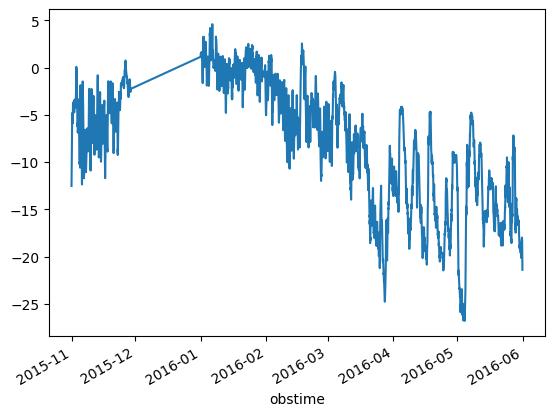

In [62]:
df['tempr'].plot()

Now we will check for stationarity. Conditions for stationarity are:
1. Means and Variance should be constant
2. Timeseries should not have any repeating pattern or trends

We now gonna use 'Augmented Dickey-Fuller' test used for checking the stationarity of a time series.

P-value = Probablity value 
if p>0.5 : dataset not stationary
if p<0.5 :  dataset is stationary

If a time series does not exhibit autocorrelation (i.e., the values are independent of each other over time), simpler models like moving averages or basic statistical methods might be sufficient for analysis and forecasting.

In [63]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['tempr'] , autolag='AIC')
print("1. ADF :" , dftest[0])   # A more negative value generally indicates stronger evidence against the null hypothesis, suggesting that the data is stationary.
print("2. P-Value:" , dftest[1])
print("3. Num of Lags :" , dftest[2]) # 32 lags in a time series model  it means the model is using the past 32 values of the time series to predict or explain the present value.
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :" , dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ":", val)


1. ADF : -3.1530044744195496
2. P-Value: 0.022871278507630665
3. Num of Lags : 32
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 4865
5. Critical Values :
	 1% : -3.4316948620176393
	 5% : -2.862134279956787
	 10% : -2.5670863365651626


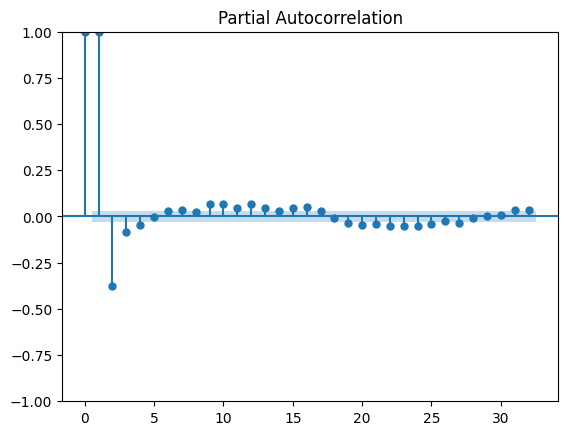

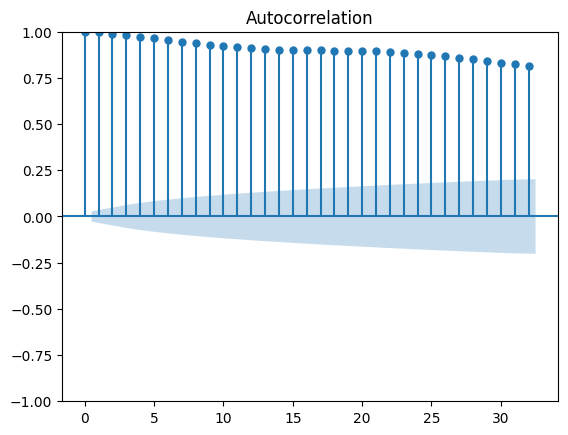

In [64]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf = plot_pacf(df['tempr'],lags=32)
acf = plot_acf(df['tempr'],lags=32)

split Dataset into Train and Test: Testing : last 7 days

In [65]:
train = X[:len(X)-7]
test = X[len(X)-7:]


In [66]:
model = AutoReg(train, lags=32).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 4891
Model:                    AutoReg(32)   Log Likelihood               -3045.293
Method:               Conditional MLE   S.D. of innovations              0.453
Date:                Fri, 16 Aug 2024   AIC                           6158.585
Time:                        11:38:45   BIC                           6379.197
Sample:                            32   HQIC                          6236.018
                                 4891                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0261      0.010     -2.736      0.006      -0.045      -0.007
y.L1           1.3558      0.014     94.551      0.000       1.328       1.384
y.L2          -0.3144      0.024    -13.013      0.0

Make Predictions on Test Set and Compare

In [67]:
print(len(train))

4891


In [68]:
pred = model.predict(start = len(train) ,end=len(X)-1, dynamic=False) # start from 4891 to 4897

[-18.06462896 -17.96112278 -17.91348098 -17.87510953 -17.84723503
 -17.8330909  -17.75067814]


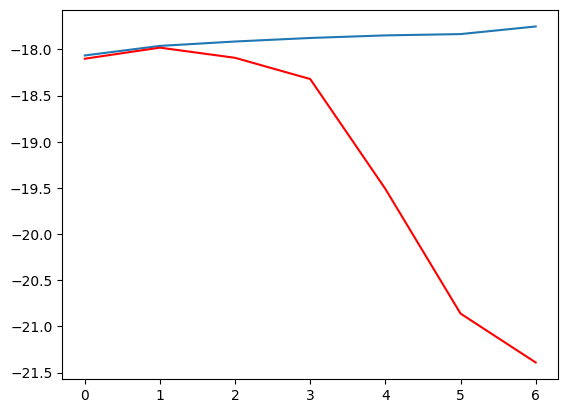

In [69]:
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test,color='red')
print(pred)

Calculate Error

In [72]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, pred))
print(rmse)

1.904968076077209
